In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_train.shape[1]

32

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [4]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2)),
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(X_train.shape[1],32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1167/1563 [=====================>........] - ETA: 2s - loss: 1.8476 - accuracy: 0.3390

KeyboardInterrupt: ignored

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
cnn = keras.Sequential([
                          
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3538 - accuracy: 0.5139
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9596 - accuracy: 0.6617
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7496 - accuracy: 0.7385
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5565 - accuracy: 0.8062
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3730 - accuracy: 0.8713
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2282 - accuracy: 0.9232
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1486 - accuracy: 0.9504
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1131 - accuracy: 0.9634
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0894 - accuracy: 0.9701
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.088

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6794 - accuracy: 0.6982


[1.6794402599334717, 0.698199987411499]

In [ ]:
y_test = y_test.reshape(-1,)

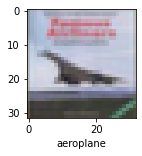

In [ ]:
plot_sample(X_test,y_test,3)

In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
classes[y_classes[5]]

'frog'

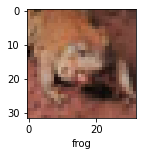

In [ ]:
plot_sample(X_test,y_test,5)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report as cr
print("Classification report \n",cr(y_test,y_classes))

Classification report 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74      1000
           1       0.83      0.81      0.82      1000
           2       0.62      0.59      0.61      1000
           3       0.54      0.48      0.51      1000
           4       0.60      0.68      0.64      1000
           5       0.60      0.57      0.58      1000
           6       0.71      0.82      0.76      1000
           7       0.76      0.71      0.73      1000
           8       0.79      0.82      0.81      1000
           9       0.71      0.82      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

